<a href="https://colab.research.google.com/github/fran-scala/ML_course_Pavia_23/blob/main/python_advance/matplotlib_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Matplotlib

Based on [Wuhan DL Lab notebook](https://github.com/farakiko/wuhan_DL_labs/blob/master/general/Matplotlib_Cheatsheet.ipynb).

**What is Matplotlib?**

[Matplotlib](https://github.com/matplotlib/matplotlib) is a low level graph plotting library in python that serves as a visualization utility. It was created by John D. Hunter and it is open source and we can use it freely. It is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility.

### Import packages and check version

Most of the Matplotlib utilities lies under the `pyplot` submodule, and are usually imported under the `plt` alias as below. After the `import` command the `pyplot` package can be referred to as `plt`.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

Matplotlib Version: 3.7.1
NumPy Version: 1.22.4
Python Version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


### A basic plot

The `plot()` function of `plt` can be used to draw points (markers) in a diagram. By default, the function draws a line from point to point. It takes parameters that specify points in the diagram:

*   Parameter 1 is an array containing the points on the x-axis.
*   Parameter 2 is an array containing the points on the y-axis.

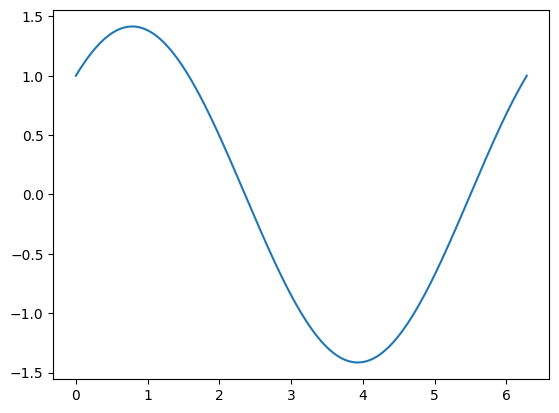

In [2]:
x = np.linspace(0,2*np.pi,10**3)
y = np.sin(x) + np.cos(x)

plt.plot(x,y)

**Labels and title**

With `pyplot`, you can use the `xlabel()` and `ylabel()` functions to set a label for the x- and y-axis.

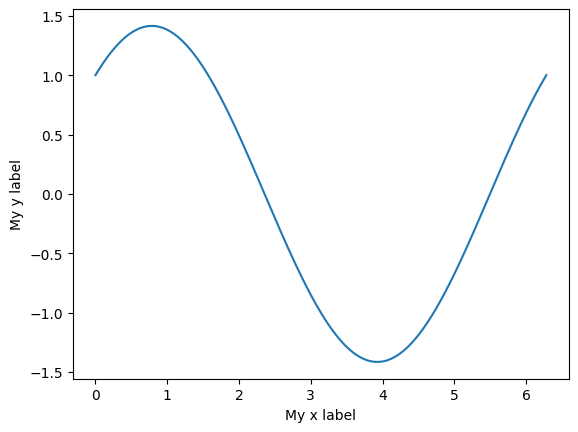

In [3]:
plt.xlabel('My x label')
plt.ylabel('My y label')
plt.plot(x,y)

You can also write mathematical expressions. You can do so by using a subset of mathematical TeX markup in any Matplotlib text. You should use raw strings (precede the quotes with an `r`), and surround the math text with dollar signs (`$`), as in TeX:

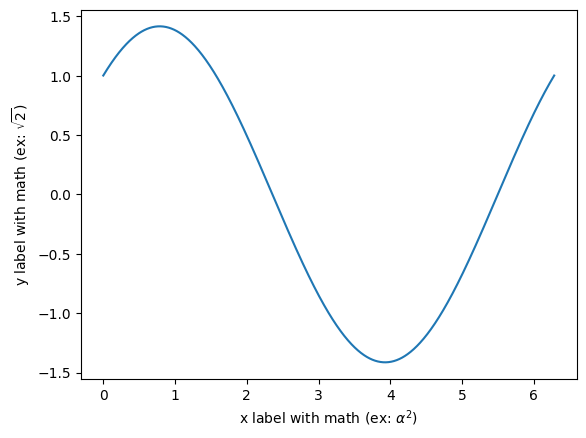

In [4]:
plt.xlabel(r'x label with math (ex: $\alpha^2$)')
plt.ylabel(r'y label with math (ex: $\sqrt{2}$)')
plt.plot(x,y)

You can use the `title()` function to set a title for the plot:

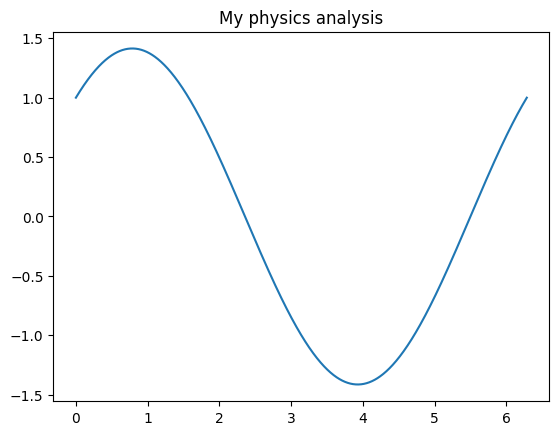

In [5]:
plt.title('My physics analysis')
plt.plot(x,y)

### The `Axes` object (multiple plots)

When we draw a graph using the `plot()` function of `pyplot`:

1.   A [`Figure`](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html) object is generated.
2.   An [`Axes`](https://matplotlib.org/stable/api/axes_api.html) object is generated corresponding to the "box" in which the graph will be drawn.
3.   All the elements of the graph such as the x and y-axis are rendered inside the `Axes` object.

To use a metaphor:

* `Figure` is like a paper where you can draw anything you want.
* We have to draw the graph in a "box", which is `Axes` in this context.
* If we’re drawing only one graph, we don’t have to draw a "box" first, just simply draw on the paper . So, we can use `plt.plot(...)` function as in the examples above.

Of course, even in such case, we can still explicitly draw a "box" on the "paper", to tell Matplotlib that we are going to draw a graph inside it using the `subplot()` function:
    

Text(0.5, 1.0, 'My physics analysis')

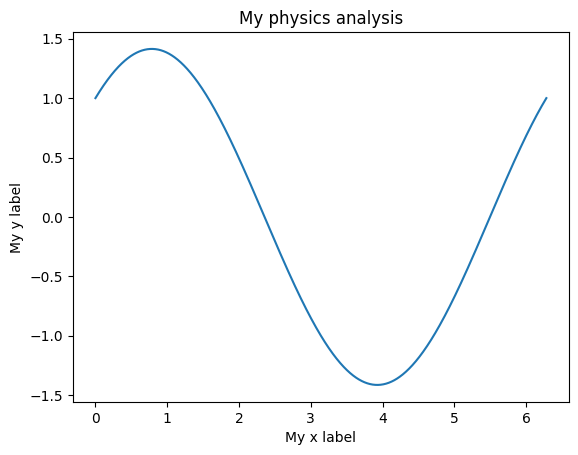

In [7]:
x = np.linspace(0,2*np.pi,10**3)
y = np.sin(x) + np.cos(x)

fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_xlabel('My x label')
ax.set_ylabel('My y label')
ax.set_title('My physics analysis')

When we just want to plot one graph, it is not necessary to "draw" this cell. However, you must be noticed that we have to do this when we want to draw multiple graphs in one plot.

With the [`subplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function you can draw multiple plots in one figure. It takes at least two arguments that describe the layout of the figure. The layout is organized in rows and columns, which are represented by the first and second argument.

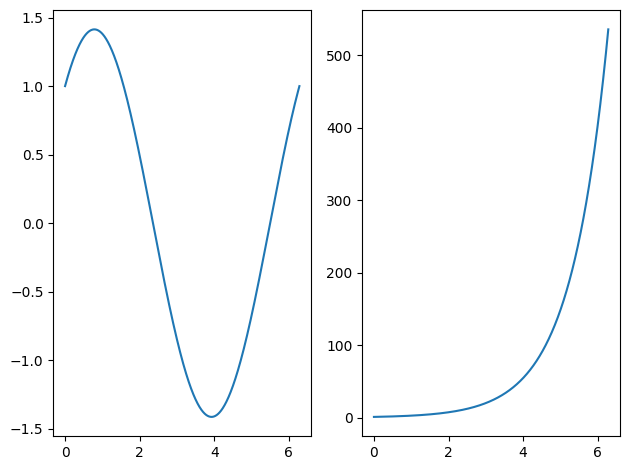

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2)
                             
#plot 1:
x = np.linspace(0,2*np.pi,10**3)
y = np.sin(x) + np.cos(x)
ax1.plot(x,y)

#plot 2:
x = np.linspace(0,2*np.pi,10**3)
y = np.exp(x)
ax2.plot(x,y)

#adjust formatting for cleaner visualization
fig.tight_layout()

For more examples of what can be done with `subplots()` you can have a look at [this notebook](https://github.com/Jwink3101/matplotlib_tips_examples/blob/master/subplots.ipynb).

### Scientific Notation

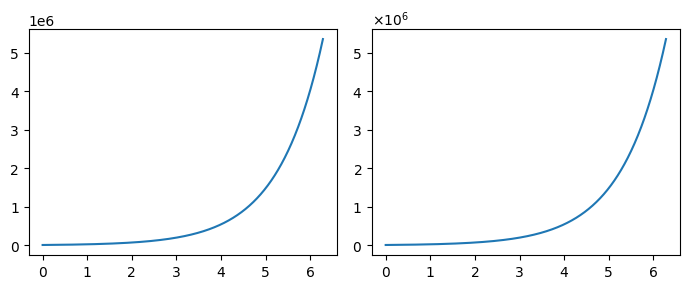

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1)

# Regular
ax1.plot(x,1e4*y)

# Scientific
ax2.plot(x,1e4*y)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))

ax2.yaxis.set_major_formatter(formatter)

fig.tight_layout()

### Ticks, Grids, Labels, and Legends

**Ticks**

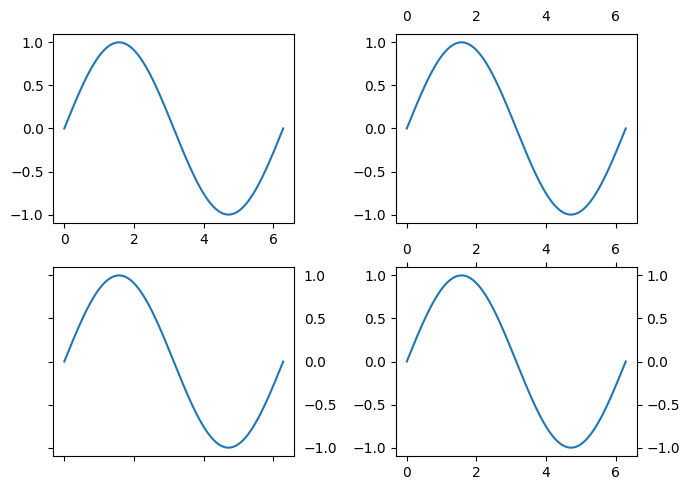

In [10]:
fig,axes = plt.subplots(2,2,figsize=(7,5),dpi=100)

X = np.linspace(0,2*np.pi,1000)
Y = np.sin(X)

for ax in axes.ravel(): #loop over axes objects and plot the data in each of them
    ax.plot(X,Y)

#example 1: leave default
ax = axes[0,0]

#example 2: add ticks labels (but no actual ticks) only at the top
ax = axes[0,1]
ax.tick_params(labeltop=True,labelbottom=False)

#example 3: add ticks labels (but no actual ticks) only at the right
ax = axes[1,0]
ax.tick_params(labelright=True,labelbottom=False,labelleft=False)

#example 4: add ticks labels (but no actual ticks) everywhere
ax = axes[1,1]
ax.tick_params(labeltop=True,labelbottom=True,labelright=True,labelleft=True)

# Now also add the actual ticks
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True)

fig.tight_layout()

Below is one more example but you can consult the [`tick_params()` function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html) to learn more on how to costumize the ticks.

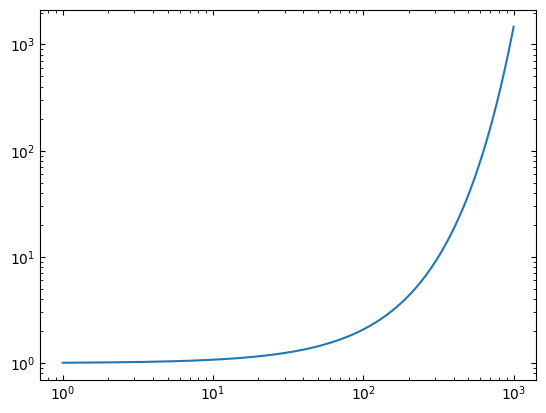

In [11]:
x = np.logspace(0,3,600)
y = 1.2**(0.04*x)
fig,ax = plt.subplots(dpi=100)
ax.plot(x,y)
ax.set(xscale='log',yscale='log')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

**Grids**

Note that this is the same with and without a log scale but the log scale shows it better. The `zorder` makes sure the plot is in front of the grid lines.

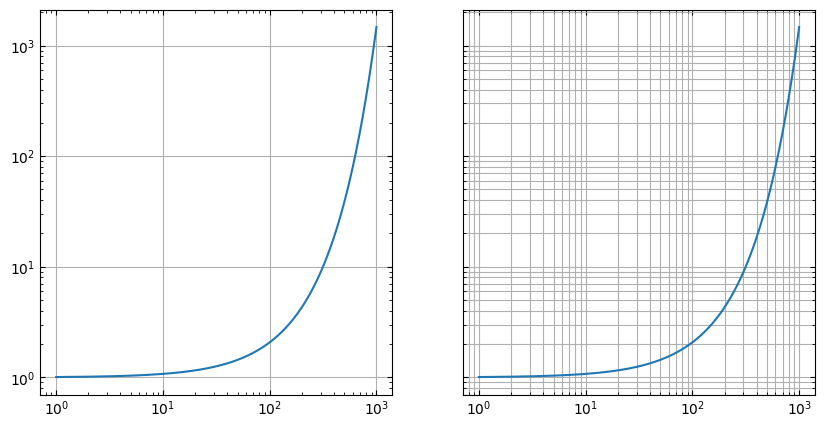

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,5))
x = np.logspace(0,3,600)
y = 1.2**(0.04*x)

for ax in (ax1,ax2):
    ax.plot(x,y)
    ax.set(xscale='log',yscale='log')
    ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',zorder=10)
ax1.grid(which='major')
ax2.grid(which='both')

**Labels**

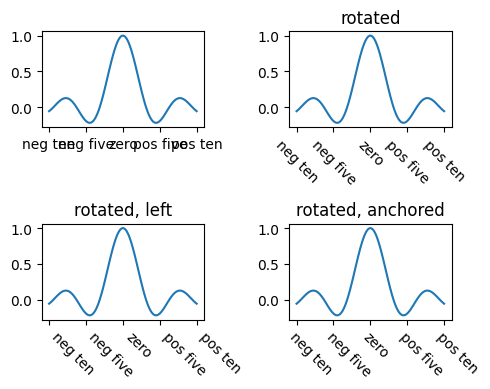

In [13]:
fig,axes = plt.subplots(2,2,figsize=(5,4),dpi=100)

x = np.linspace(-10,10,100)
y = np.sin(x)/(x + np.spacing(1))

labs = ['neg ten','neg five','zero','pos five','pos ten']

for ax in axes.ravel():
    ax.plot(x,y)
    ax.set_xticks([-10,-5,0,5,10])

#example 1: leave defaults
axes[0,0].set_xticklabels(labs)

#example 2: rotate x ticks labels by -45 deg
axes[0,1].set_xticklabels(labs,rotation=-45)
axes[0,1].set_title('rotated')

#example 3: rotate x ticks labels by -45 deg and align to the right of actual ticks
axes[1,0].set_xticklabels(labs,rotation=-45,ha='left')
axes[1,0].set_title('rotated, left')

#example 4: rotate x ticks labels by -45 deg and align to center with the actual ticks
axes[1,1].set_xticklabels(labs,rotation=-45,ha='left',rotation_mode='anchor')
axes[1,1].set_title('rotated, anchored')

fig.tight_layout()

One more example on cleaner ticks labels formatting: 

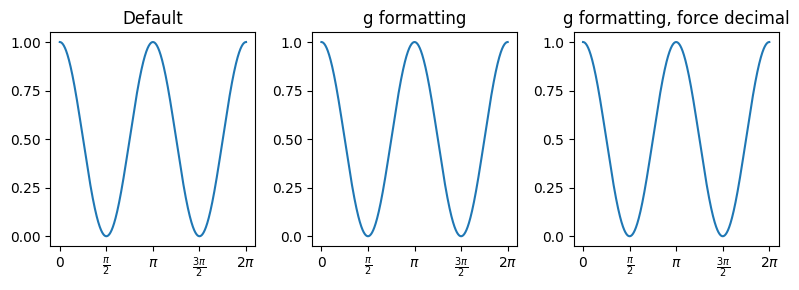

In [20]:
x = np.linspace(0,2*np.pi,1000)
y = np.cos(x)**2

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8,3),dpi=100,num=1)
for ax in (ax1,ax2,ax3):
    ax.plot(x,y)
    ax.set_yticks([0, 0.25, 0.5,0.75,1])
    ax.set_xticks(np.linspace(0,2*np.pi,5))
    ax.set_xticklabels([r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])

ax1.set_title('Default')

#g formatting choses the shorter notation
ax2.set_title('g formatting')
ax2.set_yticklabels( ['{:0.2g}'.format(l) for l in ax2.get_yticks()] )

ax3.set_title('g formatting, force decimal')
ax3.set_yticklabels( ['{:#0.2g}'.format(l) for l in ax2.get_yticks()] )
## this was the proosed version, use '#' instead
# ax3.set_yticklabels( ['{:0.2g}'.format(l) if int(l)!=float(l) else '{:0.1f}'.format(l) 
#                       for l in ax3.get_yticks()] )

fig.tight_layout()

**Legends**

There are a few ways to work a legend. And there is a lot more that can be found on the web. The main takeaway is to have `label=` in the respective plot:

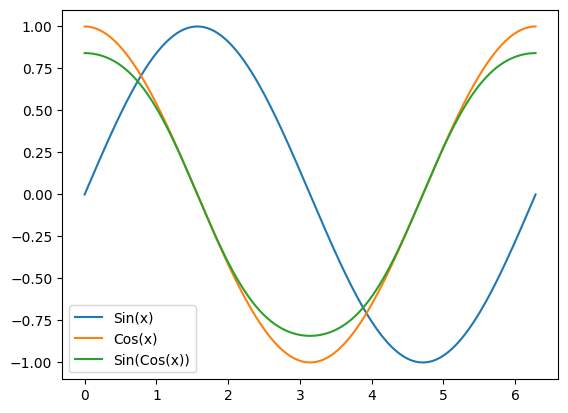

In [19]:
fig, ax = plt.subplots()

x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)
ax.plot(x,y,label='Sin(x)')

y = np.cos(x)
ax.plot(x,y,label='Cos(x)')

y = np.sin(np.cos(x))
ax.plot(x,y,label='Sin(Cos(x))')

ax.legend()

With the `loc` function you can decide the position of the legend. See all possible options in [Matplotlib legend documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). We can try one below:

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)
ax.plot(x,y,label='Sin(x)')

y = np.cos(x)
ax.plot(x,y,label='Cos(x)')

y = np.sin(np.cos(x))
ax.plot(x,y,label='Sin(Cos(x))')

ax.legend(loc='lower left')

Sometimes it is useful to add a dummy legend if you want certain entries that are not to be plotted:

In [ ]:
fig,ax = plt.subplots()

x = np.linspace(0,2*np.pi,1000)

# Real Lines
plot_lines = []
l1, = ax.plot(x,np.sin(X),'-')
l2, = ax.plot(x,np.cos(X),'-')
l3, = ax.plot(x,np.sin(np.cos(X)),'-')
plot_lines.append([l1, l2, l3])
leg1 = ax.legend(plot_lines[0], ["Sin(x)", "Cos(x)", "Sin(Cos(x))"], loc='upper right')

# Dummy lines
ax.plot([],'-rs',label='Dummy1')
ax.plot([],'k',label='Dummy2')
leg2 = ax.legend()

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

### Colorbars and colormaps

**Colormaps**

Matplotlib comes with lots of colormaps. See [colormap reference](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html).

In [ ]:
np.random.seed(362423)
A = np.random.uniform(size=(6,8))

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(9,3),dpi=100,sharex=True,sharey=True)

ax1.pcolormesh(A)
ax2.pcolormesh(A,cmap=plt.cm.Spectral_r)
ax3.pcolormesh(A,cmap=plt.cm.Purples)
ax4.pcolormesh(A,cmap=plt.cm.RdBu)
fig.tight_layout()

**Colorbars**

The first example below shows how to add the colorbar. However, when the plot size is scaled with the `ax.axis()` method, the colorbar does not automatically scale to match the new plot size.

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,edgecolor='k')
ax.axis('image') # see options at: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html
fig.colorbar(pl)

This second example shows how to also scale the colorbar. This method also works nicely with subplots (not demoed).

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
ax.axis('image')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pl,cax=cax)

You can also set the ranges of the colormap and bar:

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k',vmin=-1,vmax=2.2)
ax.axis('image')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pl,cax=cax)
cbar.set_ticks(np.linspace(-1,2.2,6))

### Multiple y-axes

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(5,3),dpi=100)

X = np.linspace(-3*np.pi,3*np.pi,1000)
Y1 = np.sin(X)/(X+0.0001)
Y2 = 1e3 * np.cos(X)
Y3 =  np.exp(np.abs(X))

# Create a twin Axes sharing the x-axis.
ax2 = ax1.twinx()

# Plotting
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,':b')

# Color the axis and add labels
ax1.set_ylabel('Y1',color='r')
ax2.set_ylabel('Y2',color='b')

ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')

# Set the spine colors
for ax in (ax1,ax2):
    ax.spines['left'].set_color('r')
    ax.spines['right'].set_color('b')

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
ax1.set_xticklabels(xticklabs) 

fig.tight_layout()

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4),dpi=100)

# Twin the x-axis twice to make independent y-axes.
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

# Plot
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,'-b')
ax3.plot(X,Y3,'-g')

colors = ['r','b','g']
axes = [ax1,ax2,ax3]
names = ['Y1','Y2','Y3']

for ax in (ax1,ax2,ax3):
    ax.spines['left'].set_color(colors[0])
    ax.spines['right'].set_color(colors[1])
ax3.spines['right'].set_color('g') # reset
    
for ax,color,name in zip(axes,colors,names):
    ax.set_ylabel(name,color=color)
    ax.tick_params(axis='y', colors=color)

# Nicer ax2 y axis
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Set ax3 to log
ax3.set_yscale('log')

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
ax1.set_xticklabels(xticklabs)

fig.tight_layout()

### Three Dimensional Data

In [ ]:
X1,X2 = np.meshgrid(*[np.linspace(-1,1,100)]*2) #meshgrid crates a grid of coordinate
F = (1.0 + (1.0/3.0)/(2.0 * X1 + X2 + 7.0/2.0) ) * np.exp(- (0.5 * (X2-1.0/5.0) * (X1 + 1.0))**2)

def _set_axis(ax,z=True):
    r =0.01
    if z:
        ax.set_zlim([0.25, 1.67])
    ax.set_xlim([-1-2*r, 1+2*r])
    ax.set_ylim([-1-2*r, 1+2*r])
    ax.set_xlabel('x1');ax.set_ylabel('x2')

**Countours**

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(9,7))

axes[0,0].contour(X1,X2,F,35)
axes[0,0].set_title('Defaults + N=35')

axes[0,1].contourf(X1,X2,F,35)
axes[0,1].set_title('Defaults filled + N=35')

axes[1,0].contourf(X1,X2,F,35)
axes[1,0].contour(X1,X2,F,35,colors='k',linewidths =0.5 )
axes[1,0].set_title('Filled + lines + N=35')

axes[1,1].contourf(X1,X2,F,35,cmap=plt.cm.Greys)
axes[1,1].contour(X1,X2,F,35,colors='k',linewidths =0.5 )
axes[1,1].set_title('Filled + lines + N=35, greys')

for ax in axes.ravel():
    _set_axis(ax,z=False)

fig.tight_layout()

In [ ]:
fig,ax = plt.subplots()
obj = ax.contourf(X1,X2,F,35,cmap=plt.cm.Spectral_r)
ax.contour(X1,X2,F,35,colors='k',linewidths =0.5 )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(obj,cax=cax)
#fig.colorbar(obj)
_set_axis(ax,z=False)

**Surface**

You can grid the surface and use `cstride` and `rstride` to control the resolution. In this example, I set with 100 points but use `cstride=4` to only plot a line every 4 spaces and `rstride=3` to plot a line every 3 in the other direction.

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r)
_set_axis(ax)

In [ ]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r,
                     linewidth=0.5, edgecolors='k')
_set_axis(ax)

In [ ]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
_set_axis(ax)

In [ ]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r,
                     linewidth=0.5, edgecolors='k')

_set_axis(ax)

# Rotate
ax.view_init(35,49)

### Box and Violin Plots

A [**Box Plot**](https://en.wikipedia.org/wiki/Box_plot) is a standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

* **Minimum (Q0 or 0th percentile)**: the lowest data point in the data set excluding any outliers;
* **Maximum (Q4 or 100th percentile)**: the highest data point in the data set excluding any outliers;
* **Median (Q2 or 50th percentile)**: the middle value in the data set
* **First quartile (Q1 or 25th percentile)**: also known as the lower quartile, it is the median of the lower half of the dataset;
* **Third quartile (Q3 or 75th percentile)**: also known as the upper quartile, it is the median of the upper half of the dataset.

In addition to the minimum and maximum values used to construct a box-plot, another important element that can also be employed to obtain a box-plot is the **interquartile range (IQR)**, defined as the distance between the upper and lower quartiles.

A box-plot usually includes a box drawn from Q1 to Q3 with a horizontal line drawn in the middle to denote the median. In addition to the box, there can be lines (which are called *whiskers*) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also called **Whisker Plot**.

In the most straight-forward method, the boundary of the lower whisker is the minimum value of the data set, and the boundary of the upper whisker is the maximum value of the data set. Another popular choice for the boundaries of the whiskers is `Q1-1.5IQR` and `Q3+1.5IQR` for the lower and upper whisker, respectively. This is the default for `boxplot` in Matplotlib and points that are above the end of such whiskers are visible.

In [ ]:
from collections import OrderedDict
samples = OrderedDict()
np.random.seed(100)

samples['normal_1'] = np.random.normal(100, 10, 200)
samples['normal_2'] = np.random.normal(80, 30, 200)
samples['normal_3'] = np.random.normal(90, 20, 200)
samples['normal_4'] = np.random.normal(70, 25, 200)

fig,ax = plt.subplots()

for ii,x in enumerate(samples.values()):
    ax.boxplot(x,positions=[ii])
    
ax.set_xticks(np.arange(len(samples)))
ax.set_xticklabels(list(samples.keys()))

In [ ]:
fig,ax = plt.subplots()

for ii,x in enumerate(samples.values()):
    ax.boxplot(x,positions=[ii],whis=(0,100)) # now set the whiskers at the min and max of the dataset
    
ax.set_xticks(np.arange(len(samples)))
ax.set_xticklabels(list(samples.keys()))

A **Violin Plot** are similar to box plots, except that they also show the probability density of the data at different values. The "width" of each curve corresponds with the approximate frequency of data points in each region. Densities are frequently accompanied by an overlaid chart type, such as box plot, to provide additional information.

In [ ]:
fig,ax = plt.subplots()

for ii,x in enumerate(samples.values()):
    vp = ax.violinplot(x,positions=[ii],showextrema=True, showmedians=True)
    color = vp['cbars'].get_color()[0]
    
    #plot the IQR
    w = 0.075
    xx = ii + np.array([-1,1])*w - 0.005 # these are the vertical edges of each box
    ax.fill_between(xx,*np.percentile(x,[25,75]),color=color,alpha=0.5) #Fill the area between two horizontal curves corresponding to Q1 and Q3 quartiles
    
ax.set_xticks(np.arange(len(samples)))
ax.set_xticklabels(list(samples.keys()))

ax.fill_between([],[],color='k',label='IQR')
ax.plot([],[],color='k',label='median')
ax.legend()


### Bar Charts

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,3),dpi=100,num=1)

Nbins = 5
Nbars = 4 # Number of bars (items) per bin

width = 1.0 /(Nbars+2)
ind = np.arange(Nbins)

# generate random data for now
np.random.seed(44328)
Data = [np.random.uniform(size=Nbins) for i in range(Nbars)]
labels = ['x','y','z','w']

#per each iteration fill the same bar of each bin
for ii,dat_item in enumerate(Data):
    ax.bar(ind + (ii+1)*width,dat_item,width,label=labels[ii])

ax.set_xticks(ind+0.5)
ax.set_xticklabels(['a','b','c','d','e'])
ax.legend(loc=2,ncol=2)  

### Fancy Boxes

In [ ]:
fig, ax = plt.subplots()

ax.text(0.5, 0.8, 'Test', color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))
ax.text(0.5, 0.6, 'Test', color='blue', 
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))
ax.text(0.5, 0.4, 'Test', color='green', 
        bbox=dict(facecolor='none', edgecolor='green', 
                  boxstyle='round'))
ax.text(0.5, 0.2, 'Test', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', 
                  boxstyle='round,pad=1'))

### Customize Style

There are three ways to customize Matplotlib:

1.   Setting `rcParams` at runtime
2.   Using style sheets
3.   Changing your `matplotlibrc` file

Setting `rcParams` at runtime takes precedence over style sheets, style sheets take precedence over `matplotlibrc` files.

**Runtime rc settings**

You can dynamically change the default *runtime configuration* (rc) settings. All rc settings are stored in a dictionary-like variable called [`matplotlib.rcParams`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams), which is global to the matplotlib package. `rcParams` can be modified directly, for example:

In [ ]:
#default rc settings
print(mpl.rcParams)

In [ ]:
#Too many parameters... let's print only two
print(mpl.rcParams['lines.linewidth'])
print(mpl.rcParams['lines.linestyle'])

In [ ]:
#Now plot with default style
data = np.random.randn(50)
plt.plot(data)

In [ ]:
#Now change two parameters of the default style
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

In order to change the default sequence of colors you have to change the `prop_cycle` property of `axes`:

In [ ]:
from cycler import cycler

#default
print(mpl.rcParams['axes.prop_cycle'])

#custom
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
print(mpl.rcParams['axes.prop_cycle'])
plt.plot(data)  # now the first color is red

In [ ]:
#reset to default
mpl.rcParams.update(mpl.rcParamsDefault)
plt.plot(data)

Matplotlib also provides a couple of convenience functions for modifying rc settings. The [`matplotlib.rc`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rc) method can be used to modify multiple settings in a single group at once, using keyword arguments:

In [ ]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])

mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

The `matplotlib.rcParams` object can also be changed temporarily using the [`matplotlib.rc_context`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rc_context) context manager:

In [ ]:
with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
    plt.plot(data)

**Using style sheets**

Another way to change the visual appearance of plots is to set the `rcParams` in a so-called style sheet and import that style sheet with `matplotlib.style.use`. In this way you can switch easily between different styles by simply changing the imported style sheet. A style sheets looks the same as a [`matplotlibrc`](https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlibrc-sample) file, but in a style sheet you can only set `rcParams` that are related to the actual style of a plot. Other `rcParams`, like *backend*, will be ignored. The `matplotlibrc` file support all `rcParams`. The rationale behind this is to make style sheets portable between different machines without having to worry about dependencies which might or might not be installed on another machine. For a list of `rcParams` that are ignored in style sheets see [`matplotlib.style.use`](https://matplotlib.org/stable/api/style_api.html#matplotlib.style.use).

There are a number of pre-defined styles provided by Matplotlib:

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
X = np.linspace(0,2*np.pi,100)
Y1 = np.sin(X)
Y2 = np.sin(X**2)
for ii,style in enumerate(sorted(plt.style.available)):
    fig,ax = plt.subplots(figsize=(3,2),num=ii)
    plt.style.use(style)
    ax.plot(X,Y1,label='Y1')
    ax.plot(X,Y2,label='Y2')
    ax.set_title(style)

plt.style.use('default')
mpl.rcParams.update(mpl.rcParamsDefault)

**Defining your own style**

You can create custom styles and use them by calling style.use with the path or URL to the style sheet.

For example, here is a file created for you to be fetched from github:

In [ ]:
!curl https://raw.githubusercontent.com/jngadiub/ML_course_Pavia_23/main/python_advance/example.mplstyle -o example.mplstyle
!cat example.mplstyle

You can import it in Matplotlib as:

In [ ]:
plt.style.use('example.mplstyle')
plt.plot(data)

Alternatively, you can make your style known to Matplotlib by placing your `<style-name>.mplstyle` file into `mpl_configdir/stylelib`. You can then load your custom style sheet with a call to `style.use(<style-name>)`. By default `mpl_configdir` should be `~/.config/matplotlib`, but you can check where yours is with `matplotlib.get_configdir()`; you may need to create this directory. You also can change the directory where Matplotlib looks for the `stylelib/` folder by setting the `MPLCONFIGDIR` environment variable, see [matplotlib configuration and cache directory locations](https://matplotlib.org/stable/users/faq/troubleshooting_faq.html#locating-matplotlib-config-dir).

Note that a custom style sheet in `mpl_configdir/stylelib` will override a style sheet defined by Matplotlib if the styles have the same name.

Once your `<style-name>.mplstyle` file is in the appropriate `mpl_configdir` you can specify your style with:

In [ ]:
#find the matplotlib config folder
mpl.get_configdir()

In [ ]:
#copy your mplstyle file
!cp example.mplstyle /root/.config/matplotlib/.
!ls /root/.config/matplotlib/

In [ ]:
#use your style
plt.style.use('example.mplstyle')
plt.plot(data)

**MPLHEP Style**

A set of helpers for Matplotlib to more easily produce plots typically needed in HEP as well as style them in way that's compatible with current collaboration requirements (ROOT-like plots for CMS, ATLAS, LHCb, ALICE). Source code and documentation can be found at [this link](https://github.com/scikit-hep/mplhep).

In [ ]:
#can be installed with pip -- do it only once unless you disconnect runtime
!pip install mplhep

In [ ]:
import mplhep as hep
hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS
# Or choose one of the experiment styles
hep.style.use(hep.style.ATLAS)
# or
hep.style.use("ATLAS") # string aliases work too
# {"ALICE" | "ATLAS" | "CMS" | "LHCb1" | "LHCb2"}

#or use matplotlib API directly
plt.style.use(hep.style.ROOT) # For now ROOT defaults to CMS

In [ ]:
#Example plot
x = np.random.uniform(0, 10, 240)
y = np.random.normal(512, 112, 240)
z = np.random.normal(0.5, 0.1, 240)

plt.style.use([hep.style.ROOT, hep.style.firamath])

f, ax = plt.subplots()
ax.scatter(x, y, c=z, label="XSX")
hep.cms.label(loc=0)

plt.show()